In [1]:
#importing packages
import pandas as pd
import numpy as np

In [2]:
A = pd.read_csv('..\OR - 21.csv')

In [3]:
#Dataset
A

,BA,DE,FE
0,0.049343,-0.276140,0.306949
1,0.023343,0.062538,-0.152858
2,-0.076148,0.041827,-0.128204
3,-0.144729,-0.212384,-0.045200
4,-0.124364,-0.242434,0.021778
...,...,...,...
121986,0.015616,0.058071,-0.040064
121987,0.054656,-0.018274,0.128409
121988,0.091844,-0.134821,-0.181005
121989,0.081702,-0.036142,0.038625


In [4]:
A.iloc[:, 1:2].values

array([[-0.27613972],
       [ 0.06253752],
       [ 0.04182705],
       ...,
       [-0.13482116],
       [-0.03614182],
       [ 0.12954202]])

In [5]:
X=A.iloc[:, 1:2].values
y=A.iloc[:, 2:3].values
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [6]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [7]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=50, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

C:\Users\leste\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [8]:
from sklearn import metrics

M1 = metrics.mean_absolute_error(y_test, y_pred);
M2 = metrics.mean_squared_error(y_test, y_pred);
M3 = np.sqrt(metrics.mean_squared_error(y_test, y_pred));

print('Mean Absolute Error:', M1)
print('Mean Squared Error:', M2)
print('Root Mean Squared Error:', M3)

Mean Absolute Error: 0.13590821243183393
Mean Squared Error: 0.04525309545817978
Root Mean Squared Error: 0.21272774961950727


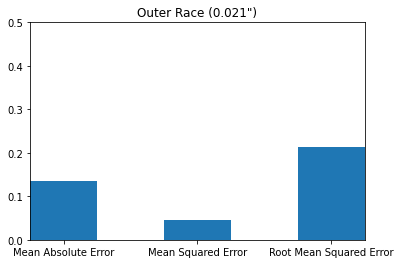

In [9]:
from matplotlib import pyplot as plt
metrics = ('Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error')
values = (M1, M2, M3)

plt.title('Outer Race (0.021")')
plt.axis([0, 2, 0, 0.5])
plt.bar(metrics, values, align='center', width=0.5)
plt.autoscale(enable=True, axis='x', tight=True)
plt.show()

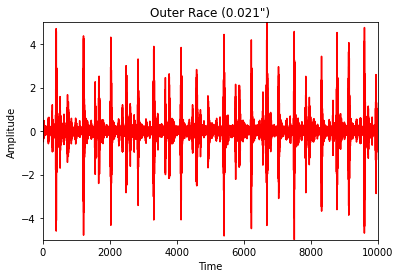

In [10]:
from matplotlib import pyplot as plt
from matplotlib import style
from numpy import genfromtxt

plt.title('Outer Race (0.021")')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.axis([0, 10000, -5, 5])
plt.plot(A, 'red')
plt.show()

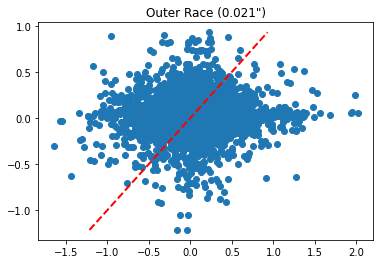

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.title('Outer Race (0.021")')
plt.scatter(y_test,y_pred)
plt.plot([y_pred.min(),y_pred.max()],[y_pred.min(),y_pred.max()],"k--",lw=2,color="red")
plt.show()

C:\Users\leste\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\leste\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\leste\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\leste\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\leste\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A col

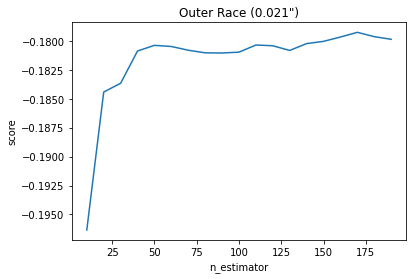

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    regressor.set_params(n_estimators=n)
    regressor.fit(X_train, y_train)
    scores.append(regressor.score(X_test, y_test))
plt.title('Outer Race (0.021")')
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

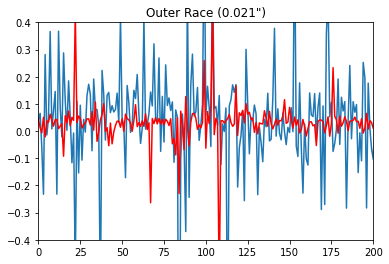

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.title('Outer Race (0.021")')
plt.axis((0,200,-0.4,0.4))
plt.plot(y_test)
plt.plot(y_pred, 'red')
